# Neural Networks for Bid/Ask Spread Forecasting
Utilize RNNs/LSTMs from Keras to forecast the bid/ask spread on an FX pair using tick data.

We use tick data from AUD/USD pair in 2010.

### TODO:
 * Complete data modelling, de-noise, clean gaps
 * Feature engineering (i.e. colums for spread, % change, # ticks in last X seconds etc?)
 * Actually do the ML

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(42)
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)

In [17]:
csv_files = glob.glob("./data/*.csv")
df = pd.concat((pd.read_csv(f, header=None, names=["symbol","date","bid","ask"]).drop("symbol", 1) for f in csv_files))
df = df.set_index("date")
num_rows = len(df)
num_mem = df.memory_usage().sum()
print("%s million rows of data, using %s MB of memory." % (num_rows/1000000, num_mem/1024/1024))

28 million rows of data, using 641 MB of memory.


### What does our data look like? 

In [53]:
df.head()

,bid,ask
date,,
20101201 00:00:00.276,0.95950,0.95970
20101201 00:00:00.277,0.95958,0.95970
20101201 00:00:00.278,0.95951,0.95970
20101201 00:00:00.293,0.95955,0.95970
20101201 00:00:00.310,0.95955,0.95963


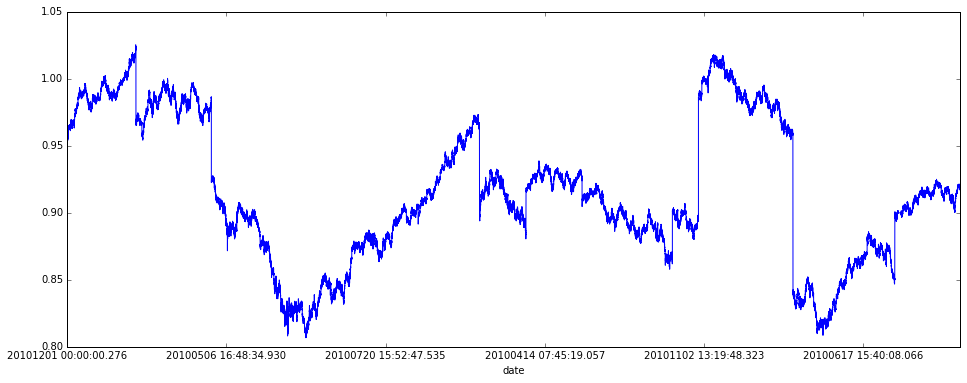

In [56]:
# Plot every 100th bid price over time.
df.iloc[::100, :]["ask"].plot()

Clearly there seem to be some issues with the massive jumps that occur. Remember, never trust your data. We can't also simply ignore gaps, because sometimes they are [very seriously real events](https://www.forbes.com/sites/investor/2015/01/15/euro-crashes-against-swiss-franc/#224bbcd12469)
**TODO clean that**

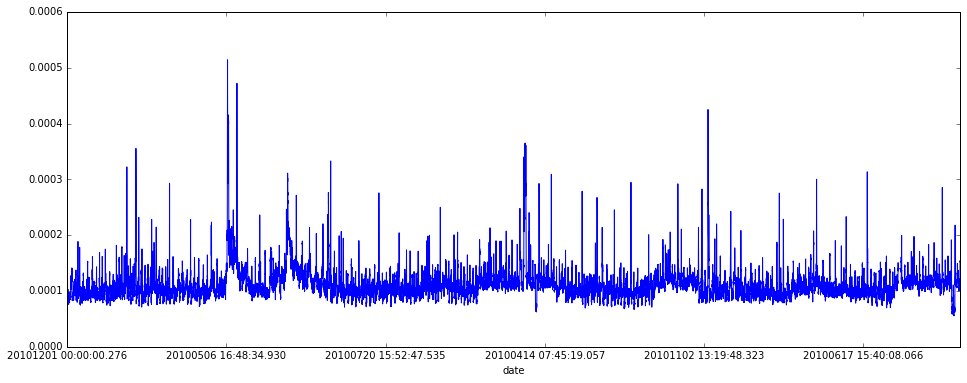

In [67]:
# Plot a rolling average of the bid/ask spread sampled from every 50 ticks.
(df.iloc[::50, :]["ask"] - df.iloc[::50, :]["bid"]).rolling(100).mean().plot()

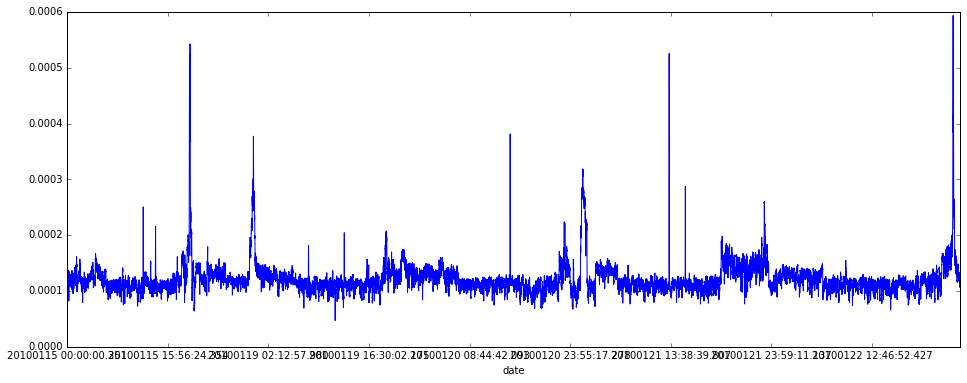

In [74]:
# For more detail, plot the bid/ask spread over a few days selected out of January.
subset = df.ix[(df.index > "20100115") & (df.index < "20100125")]
(subset["ask"] - subset["bid"]).rolling(100).mean().plot()

Visually, there seems to be some kind of structure here that we might hope to capture -- we pretty clearly have a mean-reverting process here. If there is indeed a relationship between the bid/ask and the implied volatility of an option (as a few textbooks suggest), this could form the basis of a trading strategy.